In [ ]:
#Pkg.add("Plots")                 # You need to install Plots.jl before your first time using it!
#Pkg.add("DifferentialEquations") # You need to install DifferentialEquations.jl before your first time using it!

In [1]:
#Load packages
using DifferentialEquations   #Needed to solve differential equations
using Plots

In [2]:
# Define the differential equation du/dt=f(u,p,t)
r=0.2            # a parameter used in the model
tspan=(0.0,5.0)  # the timespan over which the solution is required
u0 =100.0        # specify the initial value of y
f(u,p,t)=r*u     # RHS of du/dt=f(u,p,t)  
prob = ODEProblem(f,u0,tspan)

DiffEqBase.ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 100.0

In [3]:
# There are different ways to control the solver:

# sol = solve(prob,reltol=1e-6,saveat=0.1) # choose to have the solver save every 0.1 time points by setting saveat=0.1
# sol = solve(prob,reltol=1e-6,save_everystep=false) # only save the final time point
resultss=solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8);  # Solves the problem by "Tsit5()": Tsitouras method 
              # 1. AutoTsit5(Rosenbrock23()) handles both stiff and non-stiff equations.
              # 2. BS3() for fast low accuracy non-stiff.
              # 3. Tsit5() for standard non-stiff. 
              # 4. Vern7() for high accuracy non-stiff.
              # 5. Rodas4() for stiff equations with Julia-defined types, events, etc.
              # 6. radau() for really high accuracy stiff equations (requires installing ODEInterfaceDiffEq.jl)
# nothing #This supresses the output

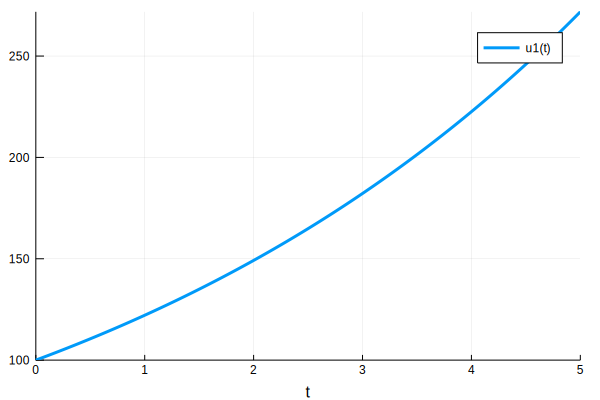

In [4]:
plot(resultss)

In [8]:
# Suppose growth is seasonal 

r=0.2                         #This is a parameter used in the model
p=0.0
fs(u,p,t)=r*u*(1+sin(2*pi*t))   #Specify the differential equation to be solved 
tspan=(0.0,5.0)
u0=100.0
res = solve(fs,u0,tspan) 
plot(res)

LoadError: [91mMethodError: no method matching solve(::#fs, ::Float64, ::Tuple{Float64,Float64})[0m
Closest candidates are:
  solve([91m::DiffEqBase.AbstractNoiseProblem[39m, ::Any...; dt, kwargs...) at /home/jrun/.julia/v0.6/DiffEqNoiseProcess/src/solve.jl:4
  solve([91m::DiffEqBase.DEProblem[39m, ::Any...; default_set, kwargs...) at /home/jrun/.julia/v0.6/DifferentialEquations/src/default_solve.jl:2
  solve([91m::DiffEqBase.AbstractODEProblem[39m, [91m::algType<:OrdinaryDiffEq.OrdinaryDiffEqAlgorithm[39m, ::Any) where algType<:OrdinaryDiffEq.OrdinaryDiffEqAlgorithm at /home/jrun/.julia/v0.6/OrdinaryDiffEq/src/solve.jl:6
  ...[39m